In [ ]:
%matplotlib inline

import pandas as pd
import re
import codecs

from functools import reduce
from jupyterthemes import jtplot

# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')

def neatify_headers(df):
    old_col_headers = list(df)
    new_col_headers = [och.replace(' ', '') for och in old_col_headers]
    rename_headers_map = {och: nch for och, nch in zip(old_col_headers, new_col_headers)}
    return df.rename(columns=rename_headers_map)

In [ ]:
filenames = ('preschool_prek', 'k_2', '3_5', '6_8', '9_12')
dfs = []
for grade_category, filename in enumerate(filenames):
    df = pd.read_csv("{}.csv".format(filename))
    df = neatify_headers(df)
    df['GradeCategory'] = grade_category
    dfs.append(df)
df = reduce(lambda a, b: a.append(b), dfs)

In [3]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

standardize_text(df, "Annotation")

TitleID                                              Title  \
0       41120                                1,2, Buckle My Shoe   
1       41223                                         1-2-3 Peas   
2       41021       10 Hungry Rabbits: Counting & Color Concepts   
3       40654                             10 Turkeys in the Road   
4       40159                                       999 Tadpoles   
5        2576                                 A-Tisket, A-Tasket   
6       40869           About Hummingbirds: A Guide for Children   
7       41316                          Adventures of Beekle, The   
8       40700                                       All in a Day   
9         433                                      America is...   
10      40227                               And Then It’s Spring   
11      40520                                      Apple Pie ABC   
12       1329                                                Art   
13      40498               Artist Who Painted a Blue Horse, The   
14      39954                                        Ava’s Poppy   
15       2423                                        Baby Beluga   
16       1873                              Baby Danced the Polka   
17      40891                                   Backseat A-B-See   
18      41319                                               Ball   
19      39643                                  Ball for Daisy, A   
20       1313                                     Ballerino Nate   
21        727                                       Banjo Granny   
22      40648                                      Bean Thirteen   
23         65                                      Bebop Express   
24      40675                              Bedtime in the Jungle   
25      40549                   Betty Bunny Loves Chocolate Cake   
26      41170                        Big and Small, Room for All   
27      41322                            Big Guy Took My Ball, A   
28       1016                                        Big Pumpkin   
29      40468                   Billy and Milly, Short and Silly   
...       ...                                                ...   
2515    15133                                     Wrong Dog, The   
2516    39481  Wuhu Diary: On Taking My Adopted Daughter Back...   
2517    38988                                  Wuthering Heights   
2518    41405                                         X: A Novel   
2519     2060   Yankee Doodle Gals: Women Pilots of World War II   
2520    41470               Yaqui Delgado Wants to Kick Your Ass   
2521    39338                        Year of Impossible Goodbyes   
2522    39350  Year of Our Revolution: New and Selected Stori...   
2523    39483                           Year of the Hangman, The   
2524    40861             Year of Wonders: A Novel of the Plague   
2525    40359  Year We Disappeared: A Father–Daughter Memoir,...   
2526    41093          Years of Dust: The Story of the Dust Bowl   
2527    37744                       Yellow Raft in Blue Water, A   
2528    40615                              Yellow Wallpaper, The   
2529    15683  Yes We Have No Neutrons: An Eye-Opening Tour T...   
2530    38854                  Yo soy el queso (I Am the Cheese)   
2531    39484                                  You Don't Know Me   
2532    39344    You Hear Me?: Poems and Writing by Teenage Boys   
2533    15810                                 Young Men and Fire   
2534    40980  Your Inner Fish: A Journey into the 3.5-Billio...   
2535    40125  Your Own Sylvia: A Verse Portrait of Sylvia Plath   
2536    41534                                              Yummy   
2537    37267                                    Z for Zachariah   
2538     2152                                                Zap   
2539    40506                                            Zeitoun   
2540    16390         Zero to Lazy Eight: The Romance of Numbers   
2541    16262            Zero: The Biography of a Dangerous Id

In [4]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["Annotation"].apply(tokenizer.tokenize)
df.head()

TitleID                                         Title  \
0    41120                           1,2, Buckle My Shoe   
1    41223                                    1-2-3 Peas   
2    41021  10 Hungry Rabbits: Counting & Color Concepts   
3    40654                        10 Turkeys in the Road   
4    40159                                  999 Tadpoles   

                                          Annotation  \
0  striking quilt squares create a fabric frame f...   
1  a cast of energetic peas count by ones and ten...   
2  an early concept book that focuses on counting...   
3  ten silly turkeys rehearsing for the turkey ci...   
4  it is springtime, and 999 tadpoles have hatche...   

                     Publisher Copyright  OriginalCopyright  Translator  \
0               Harcourt, Inc.      2008                NaN         NaN   
1             Beach Lane Books      2012                NaN         NaN   
2              Alfred A. Knopf      2012                NaN         NaN   
3  Marshall Cavendish Children      2011                NaN         NaN   
4       NorthSouth Books, Inc.      2011             2003.0  Ken Kimura   

                   Author             Illustrator  \
0  Anna Grossnickle Hines  Anna Grossnickle Hines   
1             Keith Baker             Keith Baker   
2             Anita Lobel             Anita Lobel   
3   Brenda Reeves Sturgis            David Slonim   
4              Ken Kimura       Yasunari Murakami   

                   GradeLevelSpan Language           Genre  \
0  Preschool/Pre thru K, K thru 2  English          Poetry   
1  Preschool/Pre thru K, K thru 2  English         Fiction   
2            Preschool/Pre thru K  English         Fiction   
3  Preschool/Pre thru K, K thru 2  English  Fiction, Humor   
4  Preschool/Pre thru K, K thru 2  English         Fiction   

                              Classification Culture  \
0    Counting Book, Picture Book, Read Aloud     NaN   
1  Concept Book, Counting Book, Picture Book     NaN   
2  Concept Book, Counting Book, Picture Book     NaN   
3                Counting Book, Picture Book     NaN   
4                               Picture Book     NaN   

                                         Topic  \
0   English-Language Arts/General, Mathematics   
1                                 Number Sense   
2                English-Language Arts/General   
3  English-Language Arts/General, Number Sense   
4                English-Language Arts/General   

                                          Discipline  \
0        English-Language Arts/General , Mathematics   
1        English-Language Arts/General , Mathematics   
2  English-Language Arts/General , Literacy/Motiv...   
3        English-Language Arts/General , Mathematics   
4                     English-Language Arts/General    

                        Standard Award  GradeCategory  \
0                            NaN   NaN              0   
1  Math K.CC.1-7, Math 1.NBT.1-6   NaN              0   
2                            NaN   NaN              0   
3   Math K.CC.1-7, Math 1.OA.1-8   NaN              0   
4                            NaN   NaN              0   

                                              tokens  
0  [striking, quilt, squares, create, a, fabric, ...  
1  [a, cast, of, energetic, peas, count, by, ones...  
2  [an, early, concept, book, that, focuses, on, ...  
3  [ten, silly, turkeys, rehearsing, for, the, tu...  
4  [it, is, springtime, and, 999, tadpoles, have,...

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

/anaconda3/envs/insight/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


607049 words total, with a vocabulary size of 23695
Max sentence length is 167


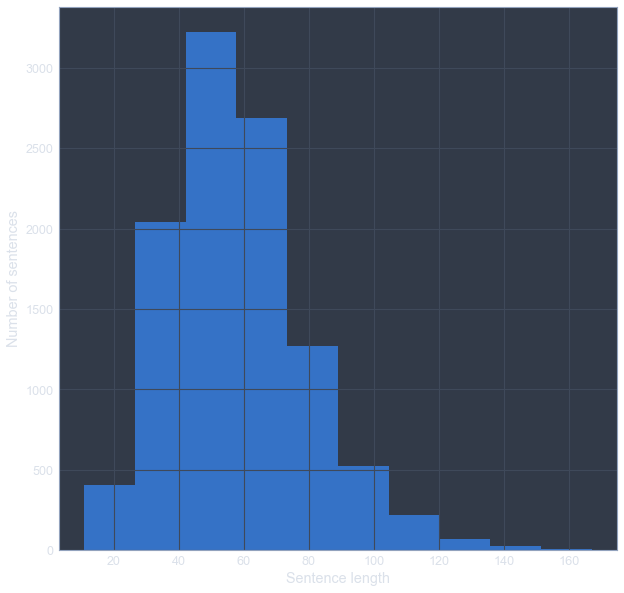

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

### First, let's try a Bag of Words Counts approach

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = df["Annotation"].tolist()
list_labels = df["GradeCategory"].tolist()

counts, count_vectorizer = cv(list_corpus)

X_train_counts, X_test_counts, y_train_counts, y_test_counts = train_test_split(counts, list_labels, test_size=0.2, 
                                                                                random_state=40)

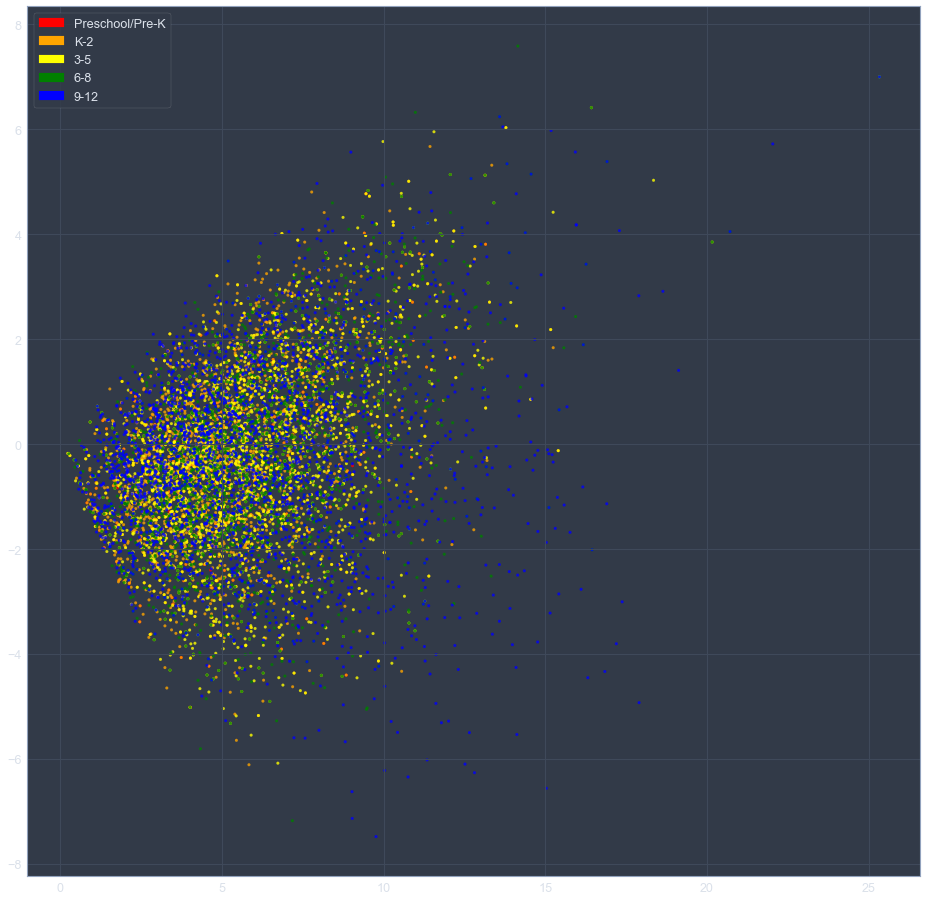

In [8]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red', 'orange', 'yellow', 'green', 'blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='red', label='Preschool/Pre-K')
            orange_patch = mpatches.Patch(color='orange', label='K-2')
            yellow_patch = mpatches.Patch(color='yellow', label='3-5')
            green_patch = mpatches.Patch(color='green', label='6-8')
            blue_patch = mpatches.Patch(color='blue', label='9-12')
            plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch, blue_patch])


fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train_counts)

y_predicted_counts = clf.predict(X_test_counts)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test_counts, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.400, precision = 0.404, recall = 0.400, f1 = 0.402


In [11]:

import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt

Normalized confusion matrix


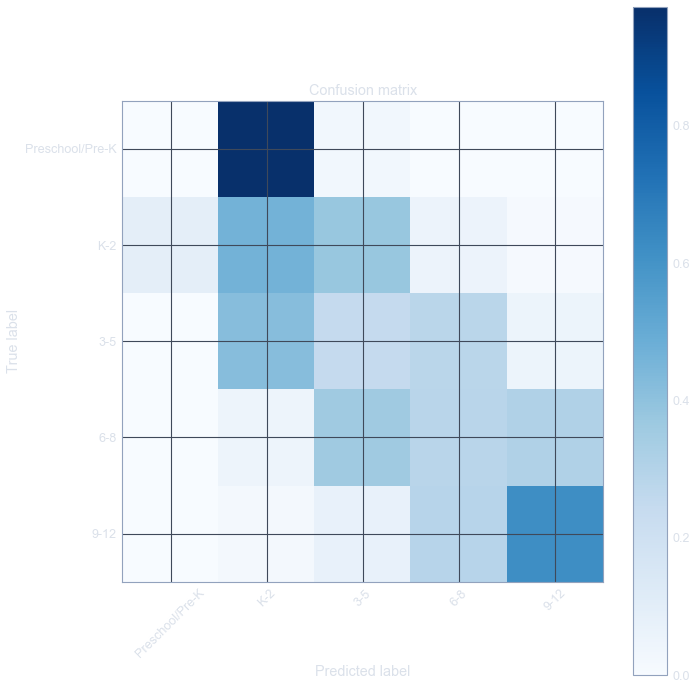

[[  0  36   1   0   0]
 [ 49 246 199  29   5]
 [  2 222 129 149  28]
 [  0  22 169 134 147]
 [  0  11  37 152 328]]


In [12]:
cm = confusion_matrix(y_test_counts, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Preschool/Pre-K','K-2','3-5', '6-8', '9-12'], normalize=True, title='Confusion matrix')
plt.show()
print(cm)

In [16]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottoms':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

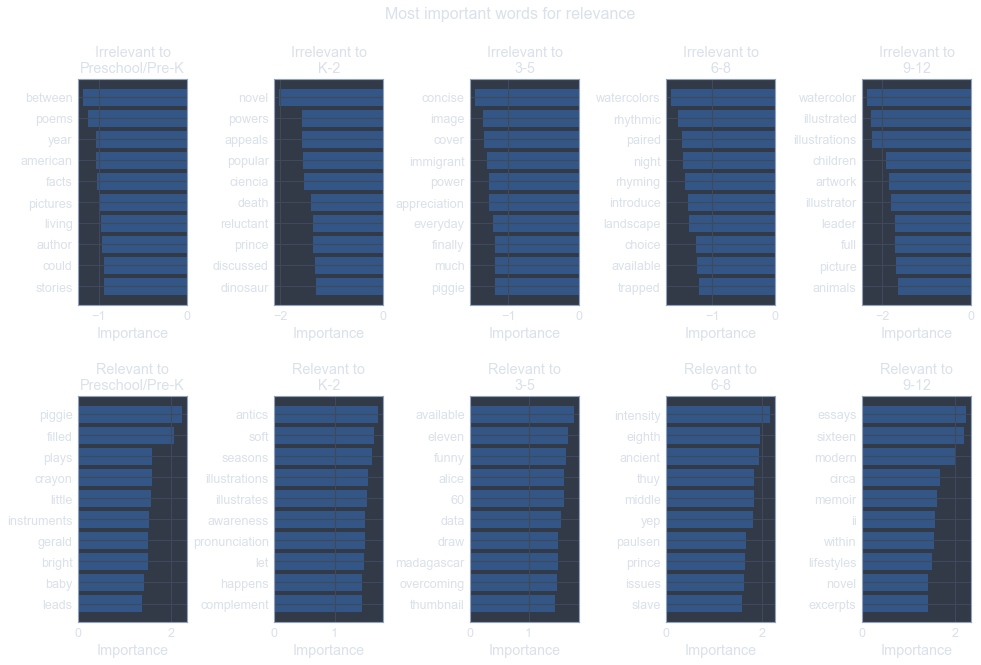

In [17]:
def plot_important_words(importance, name, keys=('bottoms', 'tops',)):
    fig = plt.figure(figsize=(16, 10))
    grade_categories = ('Preschool/Pre-K','K-2','3-5', '6-8', '9-12')
    for idx, grade_category in enumerate(grade_categories):
        
        top_scores = [a[0] for a in importance[idx][keys[1]]]
        top_words = [a[1] for a in importance[idx][keys[1]]]
        bottom_scores = [a[0] for a in importance[idx][keys[0]]]
        bottom_words = [a[1] for a in importance[idx][keys[0]]]
        
        y_pos = np.arange(len(top_words))
        
        plt.subplot(2, 5, 1 + idx)
        plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
        plt.title('Irrelevant to\n{}'.format(grade_category))
        plt.yticks(y_pos, bottom_words)
        plt.suptitle('Key words', fontsize=16)
        plt.xlabel('Importance')

        plt.subplot(2, 5, 6 + idx)
        plt.barh(y_pos,top_scores, align='center', alpha=0.5)
        plt.title('Relevant to\n{}'.format(grade_category))
        plt.yticks(y_pos, top_words)
        plt.suptitle(name, fontsize=16)
        plt.xlabel('Importance')
    
    plt.subplots_adjust(wspace=0.8, hspace=0.4)
    plt.show()

plot_important_words(importance, "Most important words for relevance")

### TFIDF Bag of Words approach

In [18]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

tfidfs, tfidf_vectorizer = tfidf(list_corpus)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidfs, list_labels, test_size=0.2, 
                                                                            random_state=40)

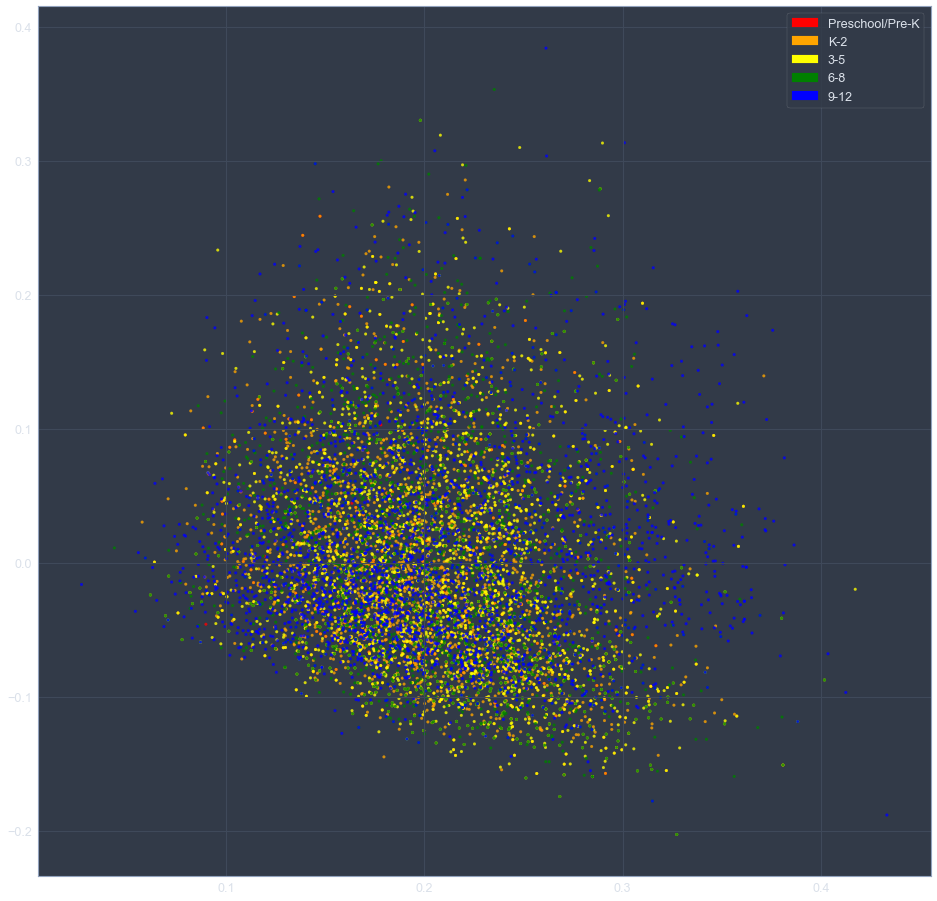

In [19]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(tfidfs, list_labels)
plt.show()

In [20]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [21]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test_tfidf, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.418, precision = 0.423, recall = 0.418, f1 = 0.420


Normalized confusion matrix


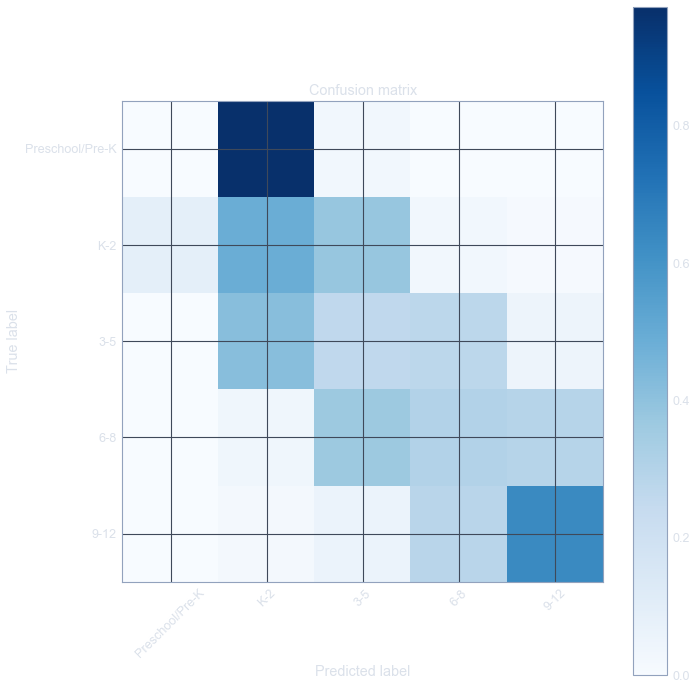

TFIDF confusion matrix
[[  0  36   1   0   0]
 [ 48 257 201  16   6]
 [  2 220 138 145  25]
 [  0  17 174 143 138]
 [  0  10  31 150 337]]
BoW confusion matrix
[[  0  36   1   0   0]
 [ 49 246 199  29   5]
 [  2 222 129 149  28]
 [  0  22 169 134 147]
 [  0  11  37 152 328]]


In [22]:
cm2 = confusion_matrix(y_test_tfidf, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
grade_categories = ('Preschool/Pre-K','K-2','3-5', '6-8', '9-12')
plot = plot_confusion_matrix(cm2, classes=grade_categories, normalize=True, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [23]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

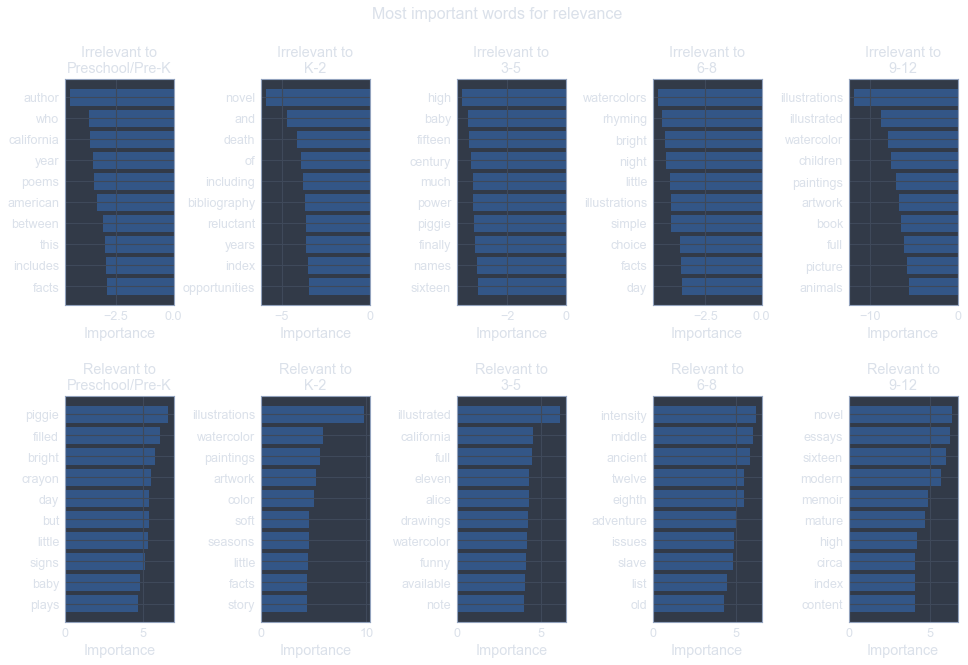

In [24]:
plot_important_words(importance_tfidf, "Most important words for relevance")

### Let's try word2vec

In [25]:
import gensim

word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [26]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [27]:
embeddings = get_word2vec_embeddings(word2vec, df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

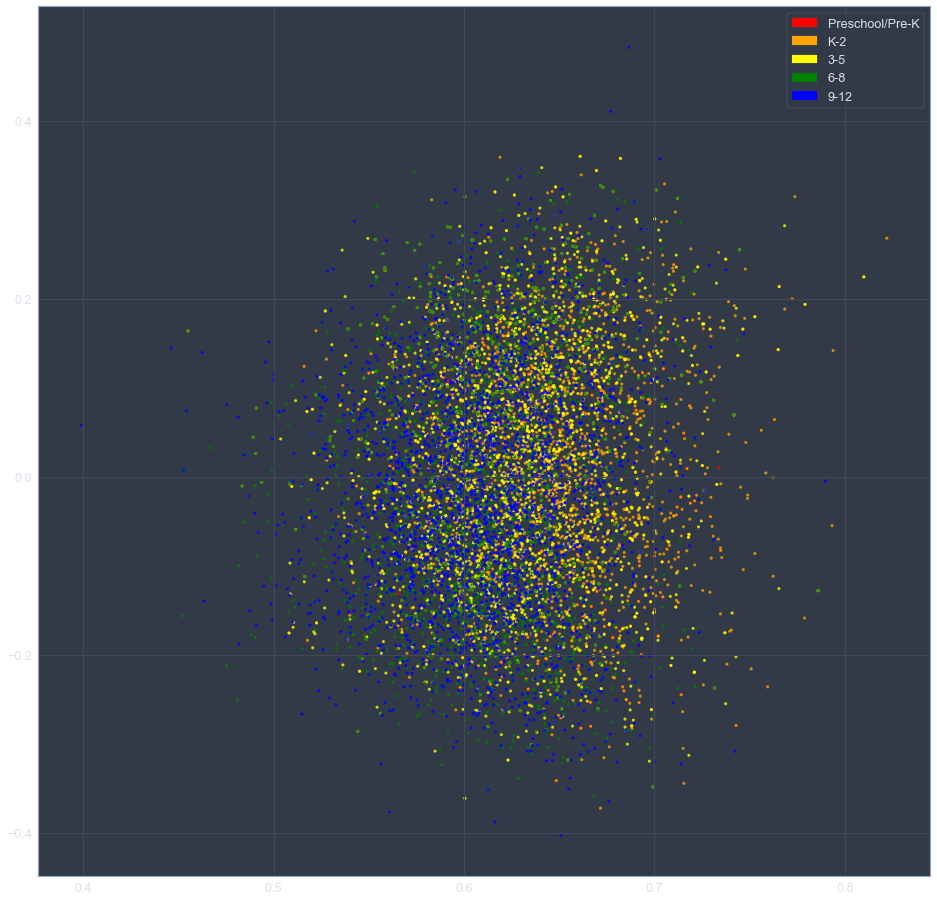

In [28]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [29]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [30]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.464, precision = 0.505, recall = 0.464, f1 = 0.481


Normalized confusion matrix


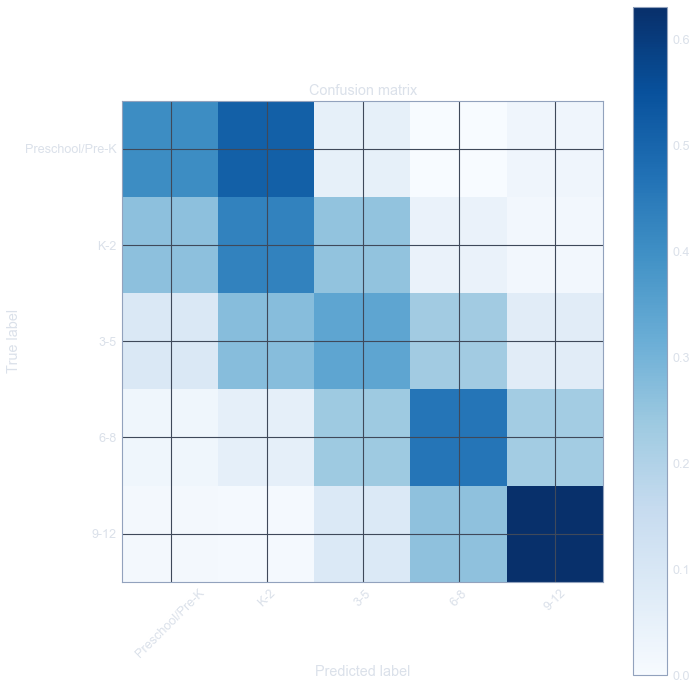

Word2Vec confusion matrix
[[ 15  19   2   0   1]
 [138 227 134  21   8]
 [ 48 144 180 121  37]
 [ 11  26 111 218 106]
 [  7   5  46 137 333]]
TFIDF confusion matrix
[[  0  36   1   0   0]
 [ 48 257 201  16   6]
 [  2 220 138 145  25]
 [  0  17 174 143 138]
 [  0  10  31 150 337]]
BoW confusion matrix
[[  0  36   1   0   0]
 [ 49 246 199  29   5]
 [  2 222 129 149  28]
 [  0  22 169 134 147]
 [  0  11  37 152 328]]


In [31]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
grade_categories = ('Preschool/Pre-K','K-2','3-5', '6-8', '9-12')
plot = plot_confusion_matrix(cm_w2v, classes=grade_categories, normalize=True, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [32]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [33]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6, labels=[0, 1, 2, 3, 4])
    return exp

def visualize_one_exp(features, labels, index, class_names = ('Preschool/Pre-K','K-2','3-5', '6-8', '9-12',)):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [34]:
visualize_one_exp(X_test_data, y_test_data, 63)

/anaconda3/envs/insight/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Index: 63
True class: 3-5


In [35]:
visualize_one_exp(X_test_data, y_test_data, 60)

/anaconda3/envs/insight/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Index: 60
True class: 3-5


In [48]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors': detractors,
            'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Preschool/Pre-K',
    1: 'K-2',
    2: '3-5',
    3: '6-8',
    4: '9-12',
}
sorted_contributions = get_statistical_explanation(X_test_data, 5, word2vec_pipeline, label_to_text)

/anaconda3/envs/insight/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


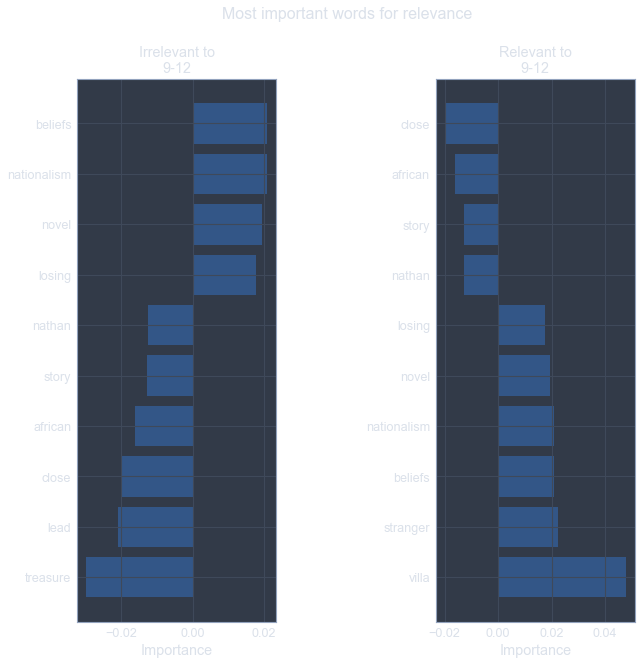

In [56]:
def plot_important_words_w2v(top_scores, top_words, bottom_scores, bottom_words, name, grade_category):
    y_pos = np.arange(len(top_words))

    fig = plt.figure(figsize=(10, 10))          
    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant to\n{}'.format(grade_category))
    plt.yticks(y_pos, bottom_words)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance')
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Relevant to\n{}'.format(grade_category))
    plt.yticks(y_pos, top_words)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance')
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

grade_category = '9-12'
top_words = sorted_contributions[grade_category]['supporters'][:10].index.tolist()
top_scores = sorted_contributions[grade_category]['supporters'][:10].tolist()
bottom_words = sorted_contributions[grade_category]['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions[grade_category]['detractors'][:10].tolist()

plot_important_words_w2v(top_scores,
                         top_words,
                         bottom_scores,
                         bottom_words,
                         "Most important words for relevance",
                         grade_category=grade_category)

In [47]:
sorted_contributions

{1: {'bottoms': ruth            -0.020361
  clock           -0.018998
  and             -0.017092
  paired          -0.015528
  planning        -0.013870
  author           0.015008
  collages         0.015452
  baby             0.015694
  cook             0.017214
  watercolor       0.019735
  illustrations    0.058607
  dtype: float64, 'tops': illustrations    0.058607
  watercolor       0.019735
  cook             0.017214
  baby             0.015694
  collages         0.015452
  author           0.015008
  planning        -0.013870
  paired          -0.015528
  and             -0.017092
  clock           -0.018998
  ruth            -0.020361
  dtype: float64}, 2: {'bottoms': challenges   -0.011145
  bring         0.011434
  barbershop    0.012671
  barber        0.013598
  colored       0.014959
  paintings     0.016408
  dtype: float64, 'tops': paintings     0.016408
  colored       0.014959
  barber        0.013598
  barbershop    0.012671
  bring         0.011434
  challenges   